In [1]:
import pandas as pd
import os

# Define the path to the resource folder where the CSV files are located
resource_folder = 'Resources'

# Initialize an empty list to store the DataFrames from each year
dataframes = []

# Create a list of file names for each year
years = range(2013, 2024)
csv_files = [f'videos_{year}.csv' for year in years]

# Read each CSV file and append the DataFrame to the list
for csv_file in csv_files:
    # Construct the full file path
    file_path = os.path.join(resource_folder, csv_file)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    # Append the DataFrame to the list
    dataframes.append(df)
    print(f'Read data from {csv_file}')

# Concatenate all DataFrames into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Export the combined DataFrame to a single CSV file
output_file_path = 'combined_videos.csv'
combined_df.to_csv(output_file_path, index=False)
print(f'Combined data exported to {output_file_path}')

Read data from videos_2013.csv
Read data from videos_2014.csv
Read data from videos_2015.csv
Read data from videos_2016.csv
Read data from videos_2017.csv
Read data from videos_2018.csv
Read data from videos_2019.csv
Read data from videos_2020.csv
Read data from videos_2021.csv
Read data from videos_2022.csv
Read data from videos_2023.csv
Combined data exported to combined_videos.csv


In [3]:
combined_df.head()

,id,published_at,views,likes,dislikes,comments,length
0,v1w1bvsMt8s,2013-02-04T15:00:39Z,200377,3867,0,304,PT11M42S
1,qMkYlIA7mgw,2013-06-05T21:35:43Z,27006549,302388,0,15248,PT4M42S
2,Aj0ftqTGMiM,2013-10-16T23:16:26Z,232232,3145,0,619,PT36S
3,JsWxLX6mfN8,2013-05-09T18:31:18Z,326483,31,0,3,PT31S
4,KfWNOnns1FM,2013-10-10T08:29:45Z,1815,2,0,0,PT4M18S


In [2]:
combined_df.count()

id              1838
published_at    1838
views           1838
likes           1838
dislikes        1838
comments        1838
length          1838
dtype: int64

In [4]:
# Use a regular expression to extract minutes and seconds from the 'length' column
combined_df[['length_minutes', 'length_seconds']] = combined_df['length'].str.extract(r'PT(?:(\d+)M)?(?:(\d+)S)?')

# Convert the extracted values to numeric (floats)
combined_df['length_minutes'] = pd.to_numeric(combined_df['length_minutes'], errors='coerce').fillna(0)
combined_df['length_seconds'] = pd.to_numeric(combined_df['length_seconds'], errors='coerce').fillna(0)

# Calculate the total length in seconds
combined_df['length_seconds_total'] = (combined_df['length_minutes'] * 60) + combined_df['length_seconds']

# Print the first few rows to verify the changes
print(combined_df.head())

            id          published_at     views   likes  dislikes  comments  \
0  v1w1bvsMt8s  2013-02-04T15:00:39Z    200377    3867         0       304   
1  qMkYlIA7mgw  2013-06-05T21:35:43Z  27006549  302388         0     15248   
2  Aj0ftqTGMiM  2013-10-16T23:16:26Z    232232    3145         0       619   
3  JsWxLX6mfN8  2013-05-09T18:31:18Z    326483      31         0         3   
4  KfWNOnns1FM  2013-10-10T08:29:45Z      1815       2         0         0   

     length  length_minutes  length_seconds  length_seconds_total  
0  PT11M42S            11.0            42.0                 702.0  
1   PT4M42S             4.0            42.0                 282.0  
2     PT36S             0.0            36.0                  36.0  
3     PT31S             0.0            31.0                  31.0  
4   PT4M18S             4.0            18.0                 258.0  


In [5]:
# Convert the 'published_at' column to datetime data type
combined_df['published_at'] = pd.to_datetime(combined_df['published_at'])

# Extract the year from the 'published_at' column
combined_df['year'] = combined_df['published_at'].dt.year

# Print the first few rows to verify the changes
print(combined_df.head())

            id              published_at     views   likes  dislikes  \
0  v1w1bvsMt8s 2013-02-04 15:00:39+00:00    200377    3867         0   
1  qMkYlIA7mgw 2013-06-05 21:35:43+00:00  27006549  302388         0   
2  Aj0ftqTGMiM 2013-10-16 23:16:26+00:00    232232    3145         0   
3  JsWxLX6mfN8 2013-05-09 18:31:18+00:00    326483      31         0   
4  KfWNOnns1FM 2013-10-10 08:29:45+00:00      1815       2         0   

   comments    length  length_minutes  length_seconds  length_seconds_total  \
0       304  PT11M42S            11.0            42.0                 702.0   
1     15248   PT4M42S             4.0            42.0                 282.0   
2       619     PT36S             0.0            36.0                  36.0   
3         3     PT31S             0.0            31.0                  31.0   
4         0   PT4M18S             4.0            18.0                 258.0   

   year  
0  2013  
1  2013  
2  2013  
3  2013  
4  2013  


In [10]:
data_df = combined_df[['id', 'year', 'views', 'length_seconds_total', 'likes']]
data_df = data_df.rename(columns={
    'id': 'ID',
    'year': 'Year',
    'views': 'View Count',
    'length_seconds_total': 'Length (s)',
    'likes':'Likes'
})
data_df_length = data_df[data_df['Length (s)'] > 0]
output_file_path = 'cleaned_videos2.csv'
data_df_length.to_csv(output_file_path, index=False)

In [11]:
row_counts_by_year = data_df_length.groupby('Year').size()
print(row_counts_by_year)

Year
2013    141
2014    136
2015    146
2016    144
2017    150
2018    159
2019    208
2020    141
2021    204
2022    129
2023    157
dtype: int64


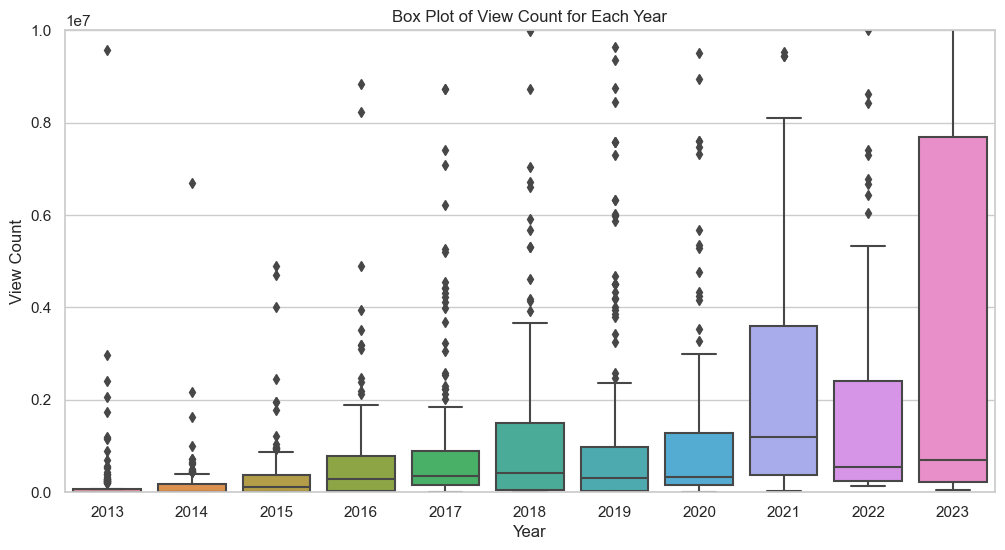

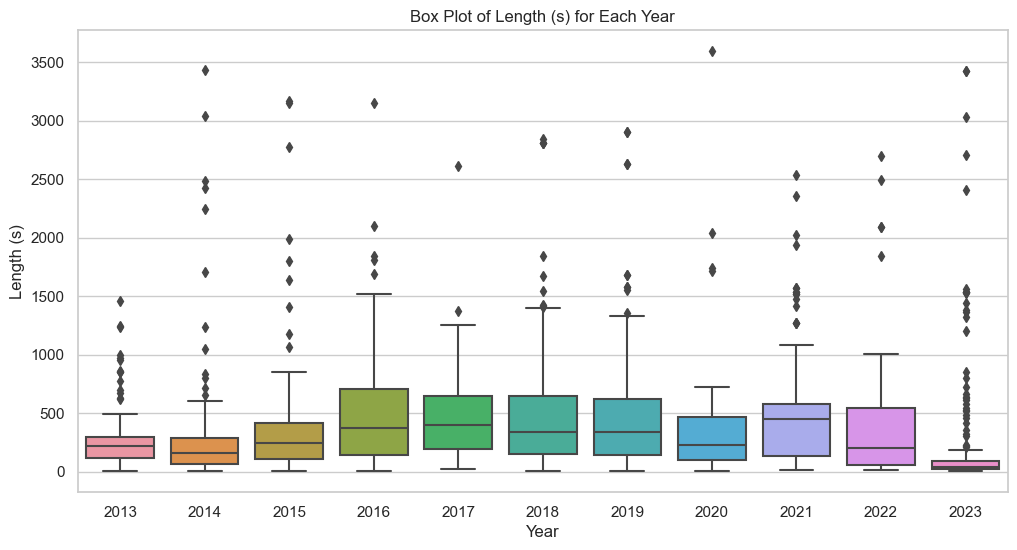

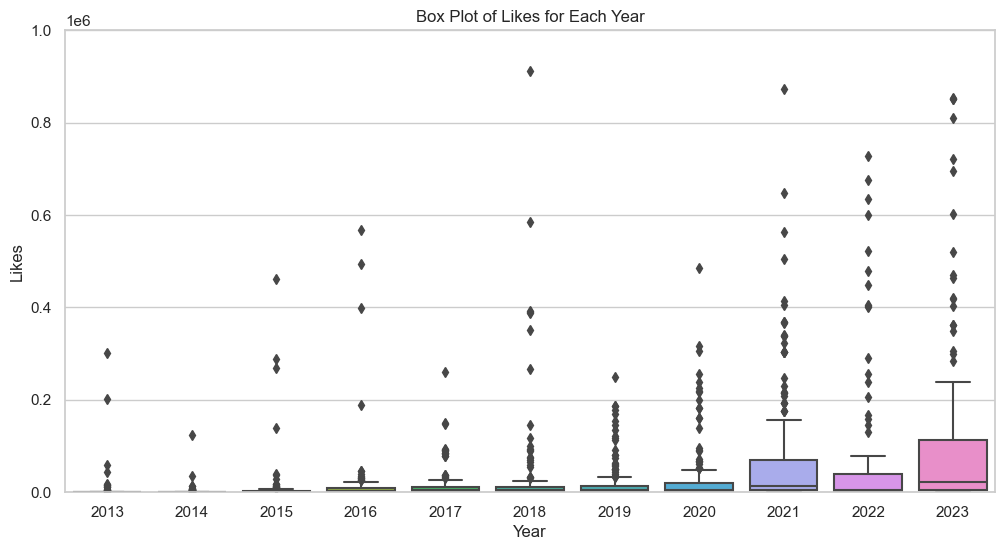

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called data_df

# Set the style for seaborn
sns.set(style='whitegrid')

# Create a box plot for 'View Count' values for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='View Count', data=data_df_length)
plt.ylim(0, 1e7)
# Add a title to the plot
plt.title('Box Plot of View Count for Each Year')

# Show the plot
plt.show()

# Create a box plot for 'Length (s)' values for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Length (s)', data=data_df_length)

# Add a title to the plot
plt.title('Box Plot of Length (s) for Each Year')


# Create a box plot for 'Likes' values for each year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Likes', data=data_df_length)

# Add a title to the plot
plt.title('Box Plot of Likes for Each Year')
plt.ylim(0, 1e6)

# Show the plot
plt.show()

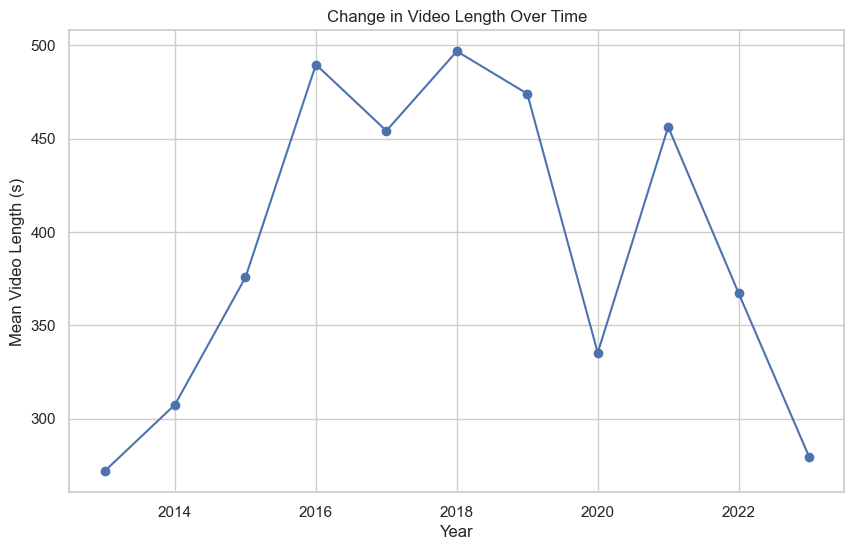

In [13]:


# Calculate the mean video length per year
mean_length_per_year = data_df_length.groupby('Year')['Length (s)'].mean()

# Plot the line graph of change in video length over time
plt.figure(figsize=(10, 6))
plt.plot(mean_length_per_year.index, mean_length_per_year.values, marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Video Length (s)')
plt.title('Change in Video Length Over Time')

# Show the plot
plt.show()

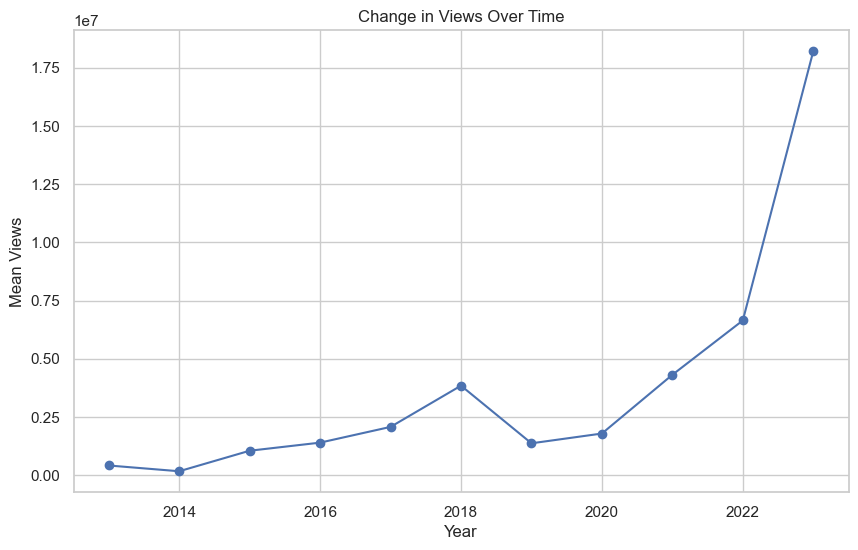

In [14]:
# Calculate the mean video length per year
mean_length_per_year = data_df_length.groupby('Year')['View Count'].mean()

# Plot the line graph of change in video length over time
plt.figure(figsize=(10, 6))
plt.plot(mean_length_per_year.index, mean_length_per_year.values, marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Views')
plt.title('Change in Views Over Time')

# Show the plot
plt.show()

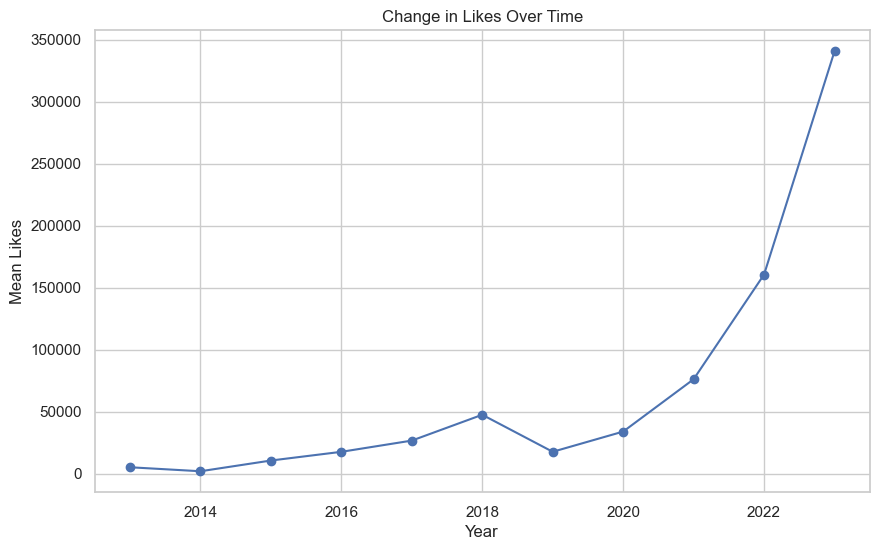

In [17]:
# Calculate the mean video likes per year
mean_length_per_year = data_df_length.groupby('Year')['Likes'].mean()

# Plot the line graph of change in video length over time
plt.figure(figsize=(10, 6))
plt.plot(mean_length_per_year.index, mean_length_per_year.values, marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Likes')
plt.title('Change in Likes Over Time')

# Show the plot
plt.show()

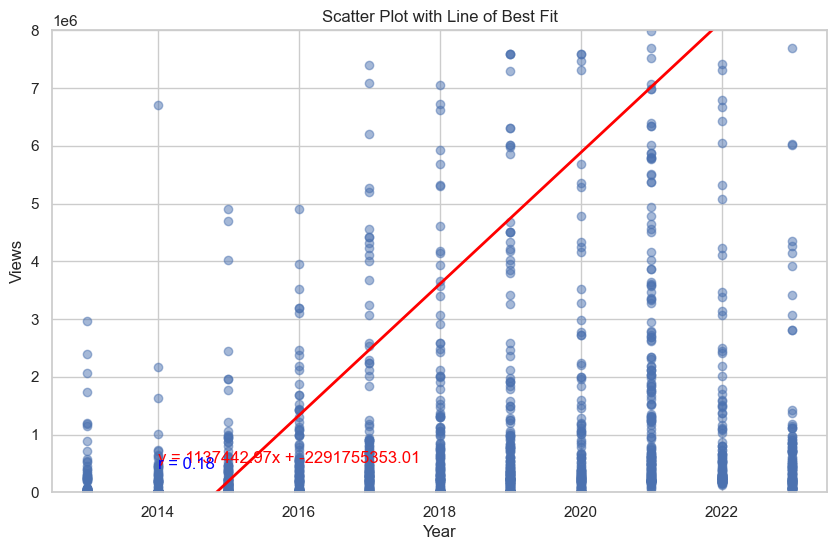

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Scatter plot of all data points
plt.figure(figsize=(10, 6))
plt.scatter(data_df_length['Year'], data_df_length['View Count'], marker='o', alpha=0.5)

# Perform linear regression
X = data_df_length['Year'].values.reshape(-1, 1)
y = data_df_length['View Count'].values
model = LinearRegression()
model.fit(X, y)

# Calculate the correlation coefficient (r value)
r, _ = pearsonr(data_df_length['Year'], data_df_length['View Count'])

# Plot the line of best fit
plt.plot(data_df_length['Year'], model.predict(X), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Views')
plt.title('Scatter Plot with Line of Best Fit')

# Set y-axis limit to 2 million
plt.ylim(0, 8e6)

# Annotate the line of best fit with its equation and r value
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
r_text = f'r = {r:.2f}'
plt.text(2014, 0.5e6, equation, color='red', fontsize=12)
plt.text(2014, 0.4e6, r_text, color='blue', fontsize=12)

# Show the plot
plt.show()

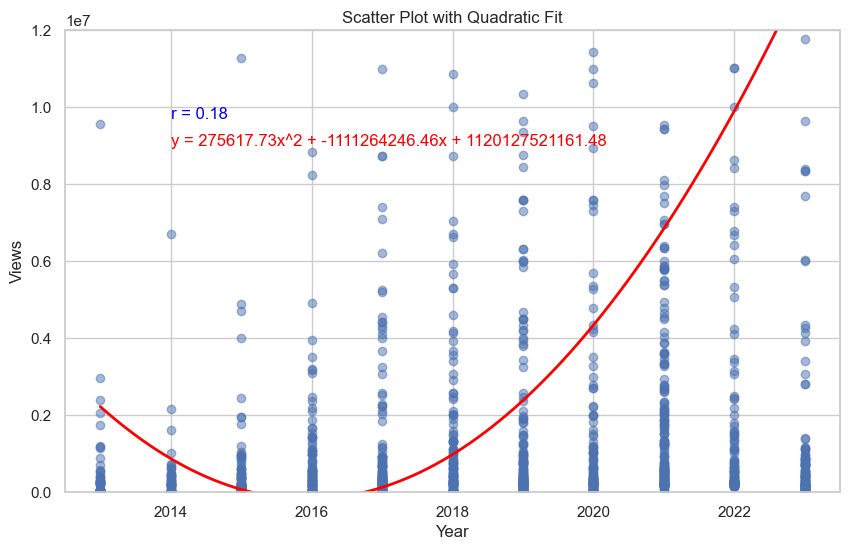

3

In [19]:
# Scatter plot of all data points
plt.figure(figsize=(10, 6))
plt.scatter(data_df_length['Year'], data_df_length['View Count'], marker='o', alpha=0.5)

# Perform quadratic curve fitting
coefficients = np.polyfit(data_df_length['Year'], data_df_length['View Count'], 2)
p = np.poly1d(coefficients)

# Calculate the correlation coefficient (r value)
r, _ = pearsonr(data_df_length['Year'], data_df_length['View Count'])

# Plot the fitted quadratic curve
x_values = np.linspace(min(data_df_length['Year']), max(data_df_length['Year']), 100)
y_values = p(x_values)
plt.plot(x_values, y_values, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Views')
plt.title('Scatter Plot with Quadratic Fit')

# Set y-axis limit to 2 million
plt.ylim(0, 12e6)

# Annotate the quadratic equation and r value
equation = f'y = {coefficients[0]:.2f}x^2 + {coefficients[1]:.2f}x + {coefficients[2]:.2f}'
r_text = f'r = {r:.2f}'
plt.text(2014, 9e6, equation, color='red', fontsize=12)
plt.text(2014, 9.7e6, r_text, color='blue', fontsize=12)

# Show the plot
plt.show()
3

In [20]:
import pandas as pd

# Select the columns of interest
columns_of_interest = ['View Count', 'Length (s)']

# Calculate the correlation matrix
correlation_matrix = data_df_length[columns_of_interest].corr()

# Print the correlation coefficients
print('Correlation Coefficients:')
print(correlation_matrix)


Correlation Coefficients:
            View Count  Length (s)
View Count    1.000000   -0.083289
Length (s)   -0.083289    1.000000
